# 필수 라이브러리 로딩

In [2]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Binarizer, KBinsDiscretizer


import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import f1_score

from warnings import filterwarnings
import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')


import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터 로딩

In [6]:
# data
data = pd.read_csv('train.csv') # index_col = 0

# target
target = data.iloc[:, -1].to_numpy()

# test
test = pd.read_csv('test.csv')   # index_col = 0

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

# 데이터 탐색

In [ ]:
# data
data["YEAR"].value_counts(0)

In [ ]:
# 결측값 확인
data.isna().sum()

In [ ]:
# 상관 계수
# data.corrwith(data[:,-1])

In [4]:
pd.DataFrame(target).value_counts()

NameError: name 'target' is not defined

# 데이터 전처리 数据预处理

## OnehotEncoding

In [5]:
data2 = data.iloc[:, 1].copy()

NameError: name 'data' is not defined

In [8]:
data2.value_counts()

COMPONENT3    7050
COMPONENT1    3890
COMPONENT2    2316
COMPONENT4     839
Name: COMPONENT_ARBITRARY, dtype: int64

In [9]:
# OneHotEncoder

x = data2.to_numpy()
x= x.reshape(-1, 1)

ohe = OneHotEncoder()
result = ohe.fit_transform(x).toarray()

name = ohe.get_feature_names()
result

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [10]:
name

array(['x0_COMPONENT1', 'x0_COMPONENT2', 'x0_COMPONENT3', 'x0_COMPONENT4'],
      dtype=object)

In [11]:
# 합치기 준비
ohe_df = pd.DataFrame(result, columns = name)
ohe_df.head()

,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


## StandardScaler

In [12]:
test_stage_features = ['ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

data = data[test_stage_features]

# 'COMPONENT_ARBITRARY', 'ANONYMOUS_1'
data.isna().sum()

ANONYMOUS_2    0
AG             0
CO             0
CR             0
CU             0
FE             0
H2O            0
MN             0
MO             0
NI             0
PQINDEX        0
TI             0
V              0
V40            0
ZN             0
dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled = ss.fit_transform(data)

In [14]:
scaled

array([[-0.3407601 , -0.15021362, -0.08963275, ..., -0.1065502 ,
         0.89989172, -0.96600175],
       [-0.0225763 , -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.31737552,  0.11914661],
       [-0.3407601 , -0.15021362, -0.08963275, ..., -0.1065502 ,
        -0.74088603, -0.33221493],
       ...,
       [ 0.29560751, -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.11580577,  1.33970343],
       [ 0.29560751, -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.31132842,  0.11914661],
       [-0.3407601 , -0.15021362, -0.08963275, ..., -0.1065502 ,
        -1.25690459,  0.04391969]])

In [15]:
data_df = pd.DataFrame(scaled, columns = test_stage_features)

In [16]:
data_df.head()

,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215
3,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888
4,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326


## Scaled Data 합치기

In [17]:
# 합치기
data = pd.concat([ohe_df, data_df], axis=1)

In [18]:
data['label'] = target

In [19]:
data.head()

,x0_COMPONENT1,x0_COMPONENT2,x0_COMPONENT3,x0_COMPONENT4,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN,label
0,0.0,0.0,1.0,0.0,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002,0
1,0.0,1.0,0.0,0.0,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147,0
2,0.0,1.0,0.0,0.0,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215,1
3,0.0,0.0,1.0,0.0,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888,0
4,0.0,0.0,1.0,0.0,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326,0


## 이상치 처리

findfont: Font family ['malgun ghthic'] not found. Falling back to DejaVu Sans.


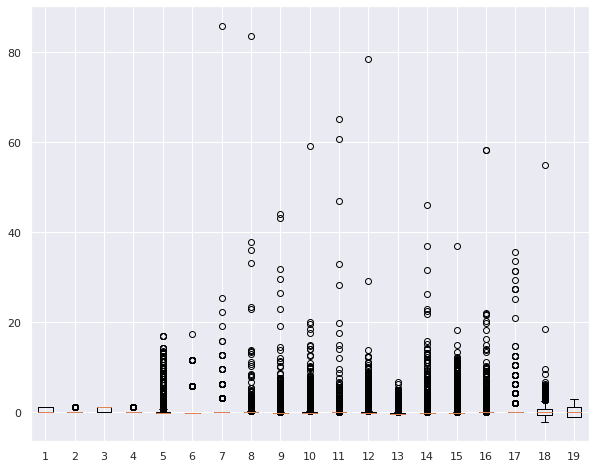

In [20]:
plt.boxplot(data.iloc[:, :-1])
plt.show()

<AxesSubplot:>

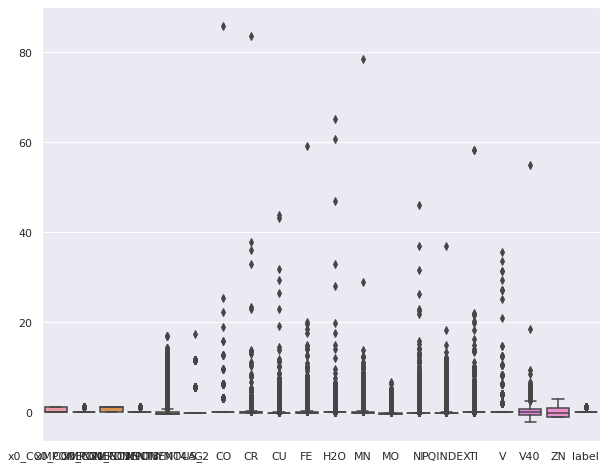

In [21]:
sns.boxplot(data=data, dodge=False)

# 데이터 분리

In [22]:
data = data.iloc[:, :-1].to_numpy()

In [23]:
data

array([[ 0.        ,  0.        ,  1.        , ..., -0.1065502 ,
         0.89989172, -0.96600175],
       [ 0.        ,  1.        ,  0.        , ..., -0.1065502 ,
        -1.31737552,  0.11914661],
       [ 0.        ,  1.        ,  0.        , ..., -0.1065502 ,
        -0.74088603, -0.33221493],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.1065502 ,
        -1.11580577,  1.33970343],
       [ 0.        ,  1.        ,  0.        , ..., -0.1065502 ,
        -1.31132842,  0.11914661],
       [ 0.        ,  1.        ,  0.        , ..., -0.1065502 ,
        -1.25690459,  0.04391969]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                   test_size=0.2, random_state=2022)

# 분류
 - 로지스틱 회귀나 분류 알고리즘 이용하여 모델 생성
 - 점수확인 

## 로지스틱

In [25]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
lr.predict_proba(X_test)

array([[0.93263407, 0.06736593],
       [0.92408511, 0.07591489],
       [0.9444692 , 0.0555308 ],
       ...,
       [0.94137131, 0.05862869],
       [0.90201887, 0.09798113],
       [0.91168433, 0.08831567]])

In [27]:
#   기울기     와     절편
print(lr.coef_, lr.intercept_)

[[ 0.07688674  0.18465846 -0.14740934 -0.11312903 -0.157169    0.0292313
  -0.10565995  0.0059008   0.02604047  0.12980668 -0.09597031 -0.00182069
   0.03598516  0.05536425  0.00786396  0.01563742 -0.03506965  0.08921805
  -0.12322529]] [-2.37639171]


In [28]:
# z값 계산
decisions = lr.decision_function(X_test)
decisions

array([-2.62787355, -2.49919131, -2.83368531, ..., -2.7761135 ,
       -2.21986057, -2.3343762 ])

In [29]:
from scipy.special import expit

print(expit(decisions))
print(1 - expit(decisions))


[0.06736593 0.07591489 0.0555308  ... 0.05862869 0.09798113 0.08831567]
[0.93263407 0.92408511 0.9444692  ... 0.94137131 0.90201887 0.91168433]


In [30]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print('Macro f1 socre : ', f1_score(y_test, pred, labels=[0,1], average='macro'))

0.9146860588861299
0.9134444838595247
Macro f1 socre :  0.4773822766036337


In [1]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

train = np.arange(-12, 12, 0.1)
result = sigmoid(train)

plt.plot(train, result)
plt.scatter(decisions, expit(decisions),marker='^' ,color = 'g', s=60)
plt.scatter(0, 0.5, marker = 'D', color = 'black')

plt.title('시그모이드 시각화')
plt.xlabel('Z값')
plt.ylabel('시그모이드값')
plt.ylim(-0.1, 1.1)
plt.show()

NameError: name 'np' is not defined

## RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_jobs=-1, random_state = 2022)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=2022)

In [33]:
rf_pred = rf.predict(X_test)

In [54]:
print('Macro f1 socre : ', f1_score(y_test, rf_pred, labels=[0,1], average='macro'))

Macro f1 socre :  0.4813255260491883


In [40]:
# pd.DataFrame(X_train)

## Xgboost

In [36]:
import xgboost as xgb

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2022)
# 90%  10%


dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)


params = {'max_depth': 3,  # 트기 최대 깊이 (3~10)
          'eta': 0.05,     # 학습률 XGBClassifier인경우 learning_rate 사용해야함
          'objective' : 'binary:logistic', # 0, 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(vinary:logistic)
          'eval_metric' : 'logloss'}  # 회귀

num_rounds = 400

In [61]:
# 학습
# xgboost 모듈의 train()함수에 파라미터로 전달
# 학습 데이터 셋은 'train' 또는 평가 데이터셋은 'eval'로 명가한다

eval_list = [(dtr,'train'),(dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds, early_stopping_rounds=100, evals=eval_list)
#                                        훈련             반복회수                    조기 중단:(최소50부터)       

[0]	train-logloss:0.65948	eval-logloss:0.65893
[1]	train-logloss:0.62904	eval-logloss:0.62796
[2]	train-logloss:0.60141	eval-logloss:0.59985
[3]	train-logloss:0.57627	eval-logloss:0.57425
[4]	train-logloss:0.55333	eval-logloss:0.55083
[5]	train-logloss:0.53236	eval-logloss:0.52937
[6]	train-logloss:0.51315	eval-logloss:0.50970
[7]	train-logloss:0.49549	eval-logloss:0.49164
[8]	train-logloss:0.47926	eval-logloss:0.47501
[9]	train-logloss:0.46435	eval-logloss:0.45972
[10]	train-logloss:0.45061	eval-logloss:0.44562
[11]	train-logloss:0.43795	eval-logloss:0.43262
[12]	train-logloss:0.42627	eval-logloss:0.42057
[13]	train-logloss:0.41547	eval-logloss:0.40943
[14]	train-logloss:0.40550	eval-logloss:0.39908
[15]	train-logloss:0.39628	eval-logloss:0.38960
[16]	train-logloss:0.38775	eval-logloss:0.38072
[17]	train-logloss:0.37986	eval-logloss:0.37257
[18]	train-logloss:0.37255	eval-logloss:0.36494
[19]	train-logloss:0.36579	eval-logloss:0.35796
[20]	train-logloss:0.35952	eval-logloss:0.35140
[2

[170]	train-logloss:0.27085	eval-logloss:0.26768
[171]	train-logloss:0.27082	eval-logloss:0.26763
[172]	train-logloss:0.27077	eval-logloss:0.26764
[173]	train-logloss:0.27072	eval-logloss:0.26764
[174]	train-logloss:0.27067	eval-logloss:0.26767
[175]	train-logloss:0.27055	eval-logloss:0.26766
[176]	train-logloss:0.27051	eval-logloss:0.26761
[177]	train-logloss:0.27046	eval-logloss:0.26764
[178]	train-logloss:0.27036	eval-logloss:0.26765
[179]	train-logloss:0.27030	eval-logloss:0.26767
[180]	train-logloss:0.27026	eval-logloss:0.26772
[181]	train-logloss:0.27023	eval-logloss:0.26770
[182]	train-logloss:0.27003	eval-logloss:0.26777
[183]	train-logloss:0.26996	eval-logloss:0.26774
[184]	train-logloss:0.26989	eval-logloss:0.26778
[185]	train-logloss:0.26986	eval-logloss:0.26773
[186]	train-logloss:0.26980	eval-logloss:0.26781
[187]	train-logloss:0.26976	eval-logloss:0.26779
[188]	train-logloss:0.26971	eval-logloss:0.26783
[189]	train-logloss:0.26967	eval-logloss:0.26784
[190]	train-logloss:

In [62]:
xgb_pred = xgb_model.predict(dtest)

In [64]:
preds = [1 if x > 0.5 else 0 for x in xgb_pred]
print('예측값 10개만 표시 : ', preds[:10])

예측값 10개만 표시 :  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [65]:
print('Macro f1 socre : ', f1_score(y_test, preds, average='macro'))

Macro f1 socre :  0.48155242812867777
